<a href="https://colab.research.google.com/github/nich02/Pakistan-Data-cleaning/blob/master/Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing Customer Satisfaction using Factor Analysis Technique**




















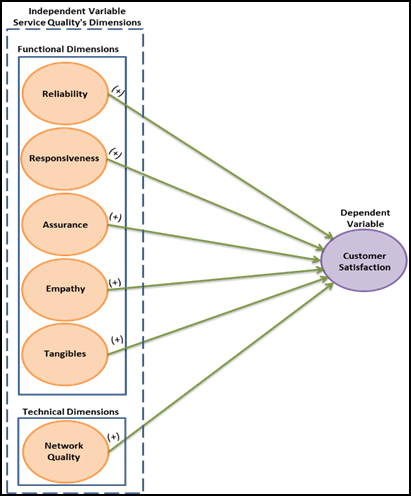

Factor analysis is a statistical technique used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. For instance is possible that variations in six observed variables mainly reflect the variations in two unobserved (underlying) variables. Factor analysis searches for such joint variations in response to unobserved latent variables. The observed variables are modelled as linear combinations of the potential factors, plus "error" terms. [More details](https://en.wikipedia.org/wiki/Factor_analysis)...

Factor analysis helps to answer some business questions..Imagine having questions and don't understand which response really is causing the results..for instance purchase barriers of potential customers. The following are possible barriers to purchase:




*   Prohibitive price
*   Our products are staying long on shelves
*   Overall implementation costs
*   Product is not consistent with our business strategy
*   I need to develop an ROI, but cannot do it
*   We are locked into a contract with another product
*   The product benefits don’t outweigh the cost
*   We have no reason to switch
*   Our IT department cannot support your product
*   We do not have sufficient technical resources
*   Your product does not have a feature we require


#**Problem Statement **

Company X, is selling costmetics and would like to understand the factors fueling the success of their business. 

The dataset we're going to use here contains 12 features of which all contribute to product profitability. However, the management does not know which factors are highly influencing.

Using the Factor Analysis technique, help the company understand these factors...



In this project we'll walh through a [Factor-Hair-Revised dataset](https://www.kaggle.com/ipravin/hair-customer-survey-data-for-100-customers), which contains 12 columns. To work on our Problem Statement we'll  use Factor Analysis Approach. 

In [16]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#!pip install tqdm
from tqdm import tqdm
import missingno


In [23]:
#Exploratory Factor analysis
#Loading my data
from google.colab import files
hairdata=files.upload()

Saving Factor-Hair-Revised.csv to Factor-Hair-Revised (2).csv


In [24]:
hairdata=pd.read_csv("Factor-Hair-Revised.csv")
hairdata.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [25]:
#Checking the columns in the dataset
hairdata.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

In [26]:
# Checking the Missing Values in the remaining columns in the dataset and the percentage to fill
missing_data =hairdata.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Column Name', 'Missing Values Count']
missing_data['Filling Factor (%)']=(hairdata.shape[0]-missing_data['Missing Values Count'])/hairdata.shape[0]*100
missing_data.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,ID,0,100.0
1,ProdQual,0,100.0
2,Ecom,0,100.0
3,TechSup,0,100.0
4,CompRes,0,100.0
5,Advertising,0,100.0
6,ProdLine,0,100.0
7,SalesFImage,0,100.0
8,ComPricing,0,100.0
9,WartyClaim,0,100.0


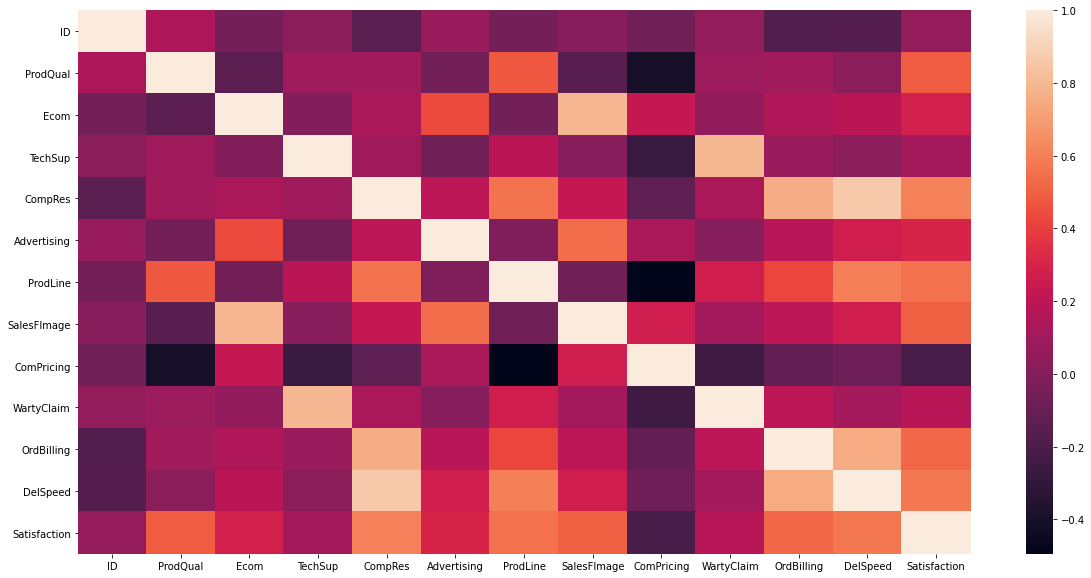

In [27]:
#Which factors are highly corellated using heatmap
import seaborn as sns
plt.figure(figsize=(20,10))
c= hairdata.corr()
sns.heatmap(c)

In [28]:
hairdata.corr(method='pearson')

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.000000,0.145774,-0.046173,0.031838,-0.144322,0.073129,-0.048641,0.013848,-0.063007,0.058592,-0.178352,-0.172134,0.061143
ProdQual,0.145774,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.046173,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.031838,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,-0.144322,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,0.073129,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,-0.048641,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,0.013848,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.063007,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.058592,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545


**Assessing factors' suitability for factor analysis**

Now we want to perform Adequacy Test
Factorability approach is done to check factors in the dataset, and also assess the suitability of the data for factor analysis. 
Two methods to check factorability or sampling adequacy:
1. Bartlett’s Test- 

2. Kaiser-Meyer-Olkin Test



In [31]:
!pip install factor-analyzer

     |████████████████████████████████| 40kB 3.4MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=9eff4aad6c3191502bb5458739c210b98aaf3d7d9b4c78db781f4ff7ed861a5a
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


(790.0967390758257, 1.2185208360263375e-118)

In [32]:
#Adequesncy test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(hairdata)
chi_square_value, p_value

(790.0967390758257, 1.2185208360263375e-118)

From this Bartlett ’s test, the p-value is e-118, meaning it's a small number. The test was statistically significant. However, the dataset isn't the best in doing factor analysis. 



Now below we test the suitability of the dataset for Factor Analysis using KMO, techbique
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model. 
KMO estimates the proportion of variance among all the observed variable. Lower proportion shows high suitability for factor analysis. Statistically, 
KMO values range between 0 and 1. 
Values of KMO less than 0.6 are considered inadequate.

In [ ]:

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(hairdata)
kmo_model

0.658818006764565

The overall KMO for our data is 0.6588, which is excellent. This value indicates that you can proceed with your planned factor analysis.

In [ ]:
# Create factor analysis object to perform our factor analysis This step helps us to extract the highly impact factors within the dataset with regard to our objective.
# The outputs are called eigenvalues which shows the level of significance among the factors
fa = FactorAnalyzer()
fa.fit(hairdata)
eigen_values, vectors = fa.get_eigenvalues()
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.04940851, 2.55663549, 1.72664228, 1.37065018, 0.83684981,
       0.63100326, 0.54725102, 0.4028055 , 0.31814687, 0.23545054,
       0.14324648, 0.09913308, 0.082777  ])

From the above output, it is observable that 4 factors have eigenvalues greater than 1. As a result these are usable factors in our Factor Analysis project 

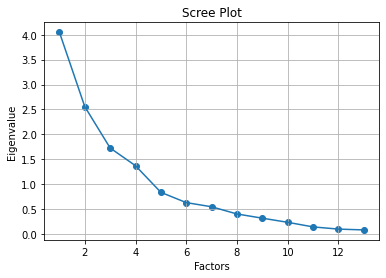

In [ ]:
# Let's create the scree plot of our eigenvalues using matplotlib
plt.scatter(range(1,hairdata.shape[1]+1),ev)
plt.plot(range(1,hairdata.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The above plot plots a straight line for each factor and its eigenvalues. Number eigenvalues greater than one are considered as the number of factors.
As a result we can see only for 4-factors eigenvalues are greater than one. It means we need to choose only 4 factors (or unobserved variables).

 **Now Let's perform Factor Analysis at this Stage**

In [ ]:
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer


     |████████████████████████████████| 40kB 4.0MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=73570636c79f161e632bfbf79817407c9a9417c4c92e659e1594e6b0033da0be
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


The FactorAnalyzer function is used to specify the number of factors we want and the rotation type. 
Rotation is to rotate the factors in order to achieve a simpler and more interpretable structure. 

This project uses varimax rotation, which maximizes the sum of the variance of squared loadings while ensuring that the factors created are not correlated (orthogonality). 
Loadings- is a matrix showing the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables

Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

Let’s see what factors are created.

In [ ]:
fa = FactorAnalyzer(4, rotation='varimax')#choosing the factor to assess we can decide to choose more
fa.fit(hairdata)
loads = fa.loadings_#Loadings are 
print(loads)

[[-0.2255782   0.05603982  0.18952397  0.03452207]
 [ 0.00541459 -0.08434396  0.81085514  0.00965041]
 [ 0.0603698   0.75112233 -0.1043734   0.02921994]
 [ 0.01605663 -0.02534807  0.09804058  0.85916269]
 [ 0.88943125  0.15791866  0.14772767  0.05962941]
 [ 0.13459834  0.54777011 -0.00498161 -0.04527974]
 [ 0.55290203 -0.09864508  0.58017482  0.17473176]
 [ 0.08373624  0.99884216 -0.05628835  0.05702462]
 [-0.11102937  0.27158644 -0.49311156 -0.23959941]
 [ 0.08925376  0.05610413  0.10378465  0.91336781]
 [ 0.76825185  0.15201237  0.10229934  0.09063428]
 [ 0.94257183  0.20332787  0.0770874   0.00824841]
 [ 0.46800439  0.47287078  0.61567199  0.05239083]]


ProdQual

Ecom	

TechSup	

CompRes

In [ ]:
# Now we can Get variance of each factors
fa.get_factor_variance()

(array([2.89470866, 2.27245219, 1.72492052, 1.68236419]),
 array([0.2226699 , 0.17480401, 0.13268619, 0.12941263]),
 array([0.2226699 , 0.39747391, 0.53016011, 0.65957273]))


The higher a factor loading, the more important a variable is for said factor. A loading cutoff of 0.5 will be used here. 
This cutoff determines which variables belong to which factor. 
For instance, we see that the first factor contains variables 9, 7, 8, 6, 5 (loadings of 0.93, 0.89, 0.76, 0.75 and 0.85 respectively).